In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar
% matplotlib inline


pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('investments_VC.csv', encoding='iso-8859-1')
data.shape

(54294, 39)

In [3]:
#drop rows with all na values
data.dropna(axis=0, how='all', inplace=True)
data.shape

(49438, 39)

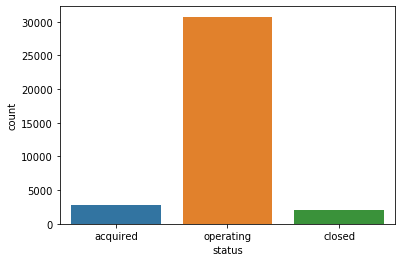

In [74]:
sns.countplot(x='status', data=data)

In [5]:
#target variable
data.status.value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

# Data Cleaning

In [6]:
data.columns = data.columns.str.replace(' ', '') 

#### Converting to proper datatypes

In [8]:
data[["founded_at"]] = data[["founded_at"]].apply(pd.to_datetime, errors='coerce')
data[["last_funding_at"]] = data[["last_funding_at"]].apply(pd.to_datetime, errors='coerce')
data[["founded_month"]] = data[["founded_month"]].apply(pd.to_datetime, errors='coerce')
data[["first_funding_at"]] = data[["first_funding_at"]].apply(pd.to_datetime, errors='coerce')

In [9]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')

#### Dropping unneccessary columns

In [10]:
data.drop(['permalink'], axis=1, inplace=True)

In [11]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,NaT,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10-01,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1.0,NaT,NaT,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05-01,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1.0,NaT,NaT,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering

Add domain name ending as a feature.

In [12]:
#split on the domain after last .
end = data["homepage_url"].str.rsplit(".", n = 1, expand = True)
data['url_ending'] = end[1]
# data.url_ending = data['url_ending'].str.rstrip('/')

#remove backslash values in the endings
slashed_vals = data['url_ending'].str.rsplit("/", n = 3, expand = True)
data['url_ending'] = slashed_vals[0]

In [13]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,url_ending
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,NaT,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10-01,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,org
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1.0,NaT,NaT,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05-01,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1.0,NaT,NaT,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com


Turn month into a string

In [14]:
data['founding_month'] = pd.DatetimeIndex(data['founded_month']).month
data['founding_month'] = data['founding_month'].fillna(0)
data.founding_month = data.founding_month.astype(int)
data['founding_month'] = data['founding_month'].apply(lambda x: calendar.month_abbr[x])

Removing only the quarter from founding_quarter

In [16]:
data['founded_quarter'] = data.founded_quarter.str.split('-').str[1]

calculate the days from the founding of the company to the first funding

In [18]:
data['days_from_founding_to_funding'] = data['first_funding_at']-data['founded_at']

Drop null values from the below columns

In [20]:
data.dropna(subset=['days_from_founding_to_funding', 'url_ending', 'status'], inplace=True)

turn the days from first funding/funding rounds into an int

In [21]:
data['days_from_founding_to_funding'] = data['days_from_founding_to_funding'].dt.days.astype('int16')
data.funding_rounds = data.funding_rounds.astype(int)

time between first and last funding round

In [71]:
data['time_between_first_and_last_funding'] = data['last_funding_at']-data['first_funding_at']
data['time_between_first_and_last_funding'] = data['time_between_first_and_last_funding'].dt.days.astype('int16')
data.time_between_first_and_last_funding = data.time_between_first_and_last_funding.astype(int)

replacing values in founded year, no NA because all observations have founded_at

In [48]:
data['founded_year'] = pd.DatetimeIndex(data['founded_at']).year

In [72]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,url_ending,founding_month,days_from_founding_to_funding,time_between_first_and_last_funding
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06-01,Q2,2012,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jun,29,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10-01,Q4,2012,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,org,Oct,-78,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04-01,Q2,2011,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Apr,0,0
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000,operating,NaN,NaN,NaN,NaN,1,2007-01-01,2007-01-01,Q1,2007,2008-03-19,2008-03-19,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,443,0
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01-01,Q1,2010,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,de,Jan,1665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,15419877,closed,MYS,NaN,MYS - Other,Damansara New Village,4,1994-01-01,1994-01-01,Q1,1994,2008-01-01,2013-02-15,0.0,7991547.0,0.0,0.0,0.0,0.0,2007363.0,5400000.0,20967.0,0.0,0.0,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,5113,1872
49432,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2007-01-01,Q1,2007,2013-01-29,2013-01-29,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,2220,0
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1,2013-01-28,2013-01-01,Q1,2013,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,420,0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5,2012-05-13,2012-05-01,Q2,2012,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,May,-194,1044


In [29]:
val = data.url_ending.value_counts().index.to_list()

In [46]:
val[-3:][0].rsplit('/')

['com', '2012', '07']

In [73]:
val[-60:]

['tomcatD',
 'zone',
 'ae',
 'dj',
 'com/2012/10',
 'de&twu=1&usg=ALkJrhgA_p5iyssKyL0mm4sr4fMnnQ9yyw',
 'php?sid=',
 'html?L=1',
 'mp',
 'cfm?SourceCode=20011109fk',
 'pm',
 'php?id=48',
 'Ai',
 'coop',
 'com/2011/05',
 'html?id=88',
 'com/wordpress/2009/08',
 'SX',
 'sr',
 'pdf',
 'com/2010/02',
 'com/sites/uciliawang/2011/12',
 'Net',
 'ci',
 'jsp?id=3001552',
 'html?gam=sem&mv=baidupz&gan=1x1%2523r-327-071457-685-m',
 'Up2CgrPI9ok',
 'FM',
 'php?id=198&L=1',
 'com/en',
 'com/2009/08',
 'com/2013/06',
 'hiv',
 'com/us',
 'com/venturecapital/2014/04',
 'hp',
 'hm',
 'life',
 'cool',
 'com/article/2013',
 'gi',
 'Vu',
 'com/?lid=/',
 'com/2007/01',
 'ec',
 'ventures',
 'nr',
 'az',
 'cx',
 'huddleapp,me',
 'asp?compid=4123',
 'com/2010/01',
 'com/2010/09',
 'com/2013',
 'solutions',
 'sparkow',
 'png',
 'com/2012/07',
 'com/2007/12',
 'com/2008/03']